#简单的线性回归_最小二乘法

In [3]:
import numpy as np
import matplotlib.pyplot as plt


In [6]:
points=np.genfromtxt('E:\Gitbendi\机器学习\数学\data.csv',delimiter=',')
points

array([[ 32.50234527,  31.70700585],
       [ 53.42680403,  68.77759598],
       [ 61.53035803,  62.5623823 ],
       [ 47.47563963,  71.54663223],
       [ 59.81320787,  87.23092513],
       [ 55.14218841,  78.21151827],
       [ 52.21179669,  79.64197305],
       [ 39.29956669,  59.17148932],
       [ 48.10504169,  75.3312423 ],
       [ 52.55001444,  71.30087989],
       [ 45.41973014,  55.16567715],
       [ 54.35163488,  82.47884676],
       [ 44.1640495 ,  62.00892325],
       [ 58.16847072,  75.39287043],
       [ 56.72720806,  81.43619216],
       [ 48.95588857,  60.72360244],
       [ 44.68719623,  82.89250373],
       [ 60.29732685,  97.37989686],
       [ 45.61864377,  48.84715332],
       [ 38.81681754,  56.87721319],
       [ 66.18981661,  83.87856466],
       [ 65.41605175, 118.5912173 ],
       [ 47.48120861,  57.25181946],
       [ 41.57564262,  51.39174408],
       [ 51.84518691,  75.38065167],
       [ 59.37082201,  74.76556403],
       [ 57.31000344,  95.45505292],
 

In [20]:
#提取points中的数据，分别作为X 和 Y
x=points[:,0]
y=points[:,1]


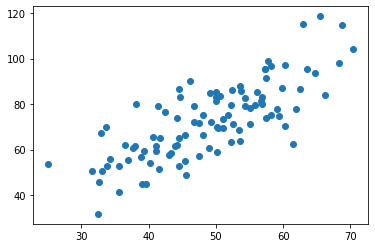

In [21]:
#用plt画出散点图
plt.scatter(x,y)
plt.show()

##2、定义损失函数

In [31]:
#损失函数是系数的函数,另外还要传入数据x， y
def comput_cost(w,b,points):
    total_cost=0
    m=len(points)
    #逐点计算平方损失误差，然后求平均数   ，最小二乘法的均方差
    for i in range(m):
        x=points[i,0]
        y =points[i,1]
        total_cost+=( y -w *x -b)**2
    return total_cost/m

##3、定义算法拟合函数

In [32]:
#先定义一个求均值的函数
def average(data):   #传进来的是一组平均数组，data
        sum = 0
        num = len(data)
        for i in range(num):
            sum +=data[i]    #遍历出来的data每一个都要加一遍
        return sum/num   #返回最后求出遍历出data的和除以data的个数
#定义核定你和函数
def fit(points):  #传入打开的数据
    m=len(points)     #获取传入数据的长度
    x_bar=average(points[:,0])   #求 x列的平均值  ，取出数据的所有行的第零列数据
    sum_xy=0
    sum_x2=0
    sum_delat=0
    for i in range(m): 
        x=points[i,0]
        y =points[i,1]#获取的数据长度进行遍历，
        sum_xy+= y * (x -x_bar)  #根据求 系数w 的公式，求出分子值，对每一个 y* (x-x_bar)求和
        sum_x2+=x**2  #求 x 的平方
    #根据公式计算w
    w =sum_xy / (sum_x2-m*(x_bar**2)) 
    for i in range(m):
        x=points[i,0]
        y=points[i,1]
        sum_delat+=(y - w * x )  #对所有的(y - w * x ) 进行求和，
    b = sum_delat / m  #用(y - w * x ) 求和除以获取的数据长度得出系数b的值
    return w, b
        

###4、测试

In [34]:
w,b=fit(points)  #赋值，直接调用定义的fit方法
print("w is ",w)
print("b is ",b)
cost=comput_cost(w,b,points)
print(cost)

w is  1.3224310227553846
b is  7.991020982269173
110.25738346621313


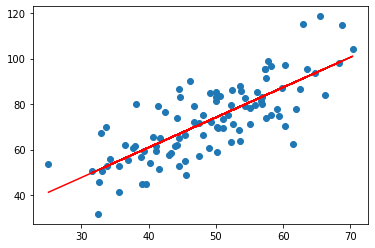

In [37]:
#5、画出拟合曲线
plt.scatter(x,y)
#针对每一个x，计算出预测的y值
pred_y=w*x+b
plt.plot(x,pred_y,c="r")
plt.show()